<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-258-Deep_Learning/blob/main/Assignment_07/04_initialization_strategies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Imports
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

In [2]:
# Step 2: Load and Prepare Data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train[..., tf.newaxis].astype("float32") / 255.0
x_test = x_test[..., tf.newaxis].astype("float32") / 255.0

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Step 3: Define Model Builder

def build_model(initializer):
    model = models.Sequential([
        layers.Input(shape=(28, 28, 1)),
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_initializer=initializer),
        layers.Dropout(0.3),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [4]:
# Step 4: Train with different initializers
initializers_list = [
    ('GlorotUniform', initializers.GlorotUniform()),
    ('HeNormal', initializers.HeNormal()),
    ('RandomNormal', initializers.RandomNormal(stddev=0.05)),
]

histories = {}
for name, init in initializers_list:
    print(f"Training with {name} initializer...")
    model = build_model(init)
    history = model.fit(x_train, y_train_cat, validation_data=(x_test, y_test_cat),
                        epochs=10, batch_size=64, verbose=0)
    histories[name] = history

Training with GlorotUniform initializer...
Training with HeNormal initializer...
Training with RandomNormal initializer...


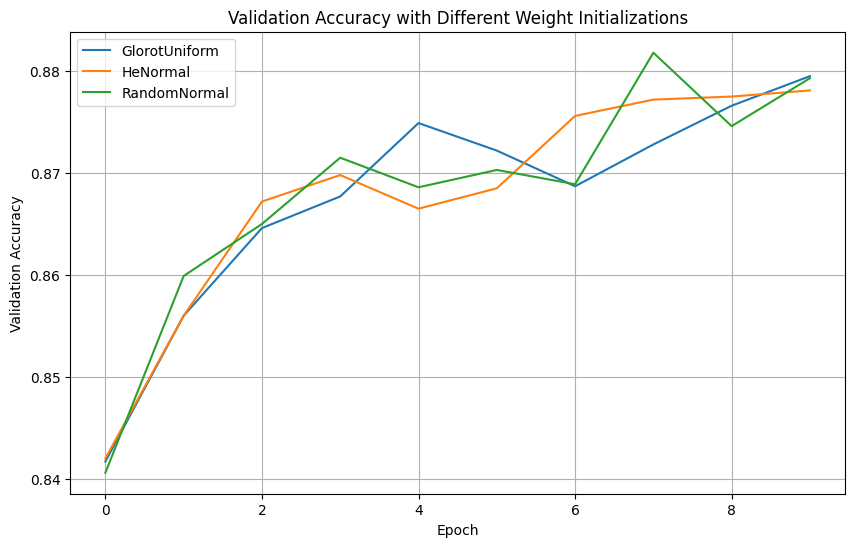

In [5]:
# Step 5: Plot validation accuracy comparison
plt.figure(figsize=(10, 6))
for name in histories:
    plt.plot(histories[name].history['val_accuracy'], label=name)
plt.title("Validation Accuracy with Different Weight Initializations")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()